In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

DATA_PATH = "../../data/processed/newtons_second_law_cleaned_dataset.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Feature-engineered dataset not found at: {DATA_PATH}")

In [2]:
df = pd.read_csv(DATA_PATH)
print(f"Loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

Loaded dataset: 3000 rows × 7 columns


,Mass_kg,Acceleration_ms2,Force_N,mass_x_acceleration,log_mass,log_acceleration,log_force
0,4.058131,13.486790,54.731161,54.731161,1.400723,2.601711,4.002433
1,9.531786,15.953960,152.069729,152.069729,2.254632,2.769707,5.024339
2,7.453942,5.084311,37.898163,37.898163,2.008743,1.626160,3.634903
3,6.187256,12.534995,77.557215,77.557215,1.822492,2.528524,4.351016
4,1.982177,11.477745,22.750923,22.750923,0.684196,2.440410,3.124606


In [3]:
features = ["Mass_kg", "Acceleration_ms2", "mass_x_acceleration"]
target = "Force_N"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (2400, 3), Test set: (600, 3)


In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained.")
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(features, model.coef_)))

✅ Model trained.
Intercept: 0.0
Coefficients: {'Mass_kg': 3.9532465334546214e-15, 'Acceleration_ms2': -3.3306690738754696e-16, 'mass_x_acceleration': 0.9999999999999997}


In [5]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📈 R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.4f}")

📈 R² Score: 1.0000
📉 RMSE: 0.0000


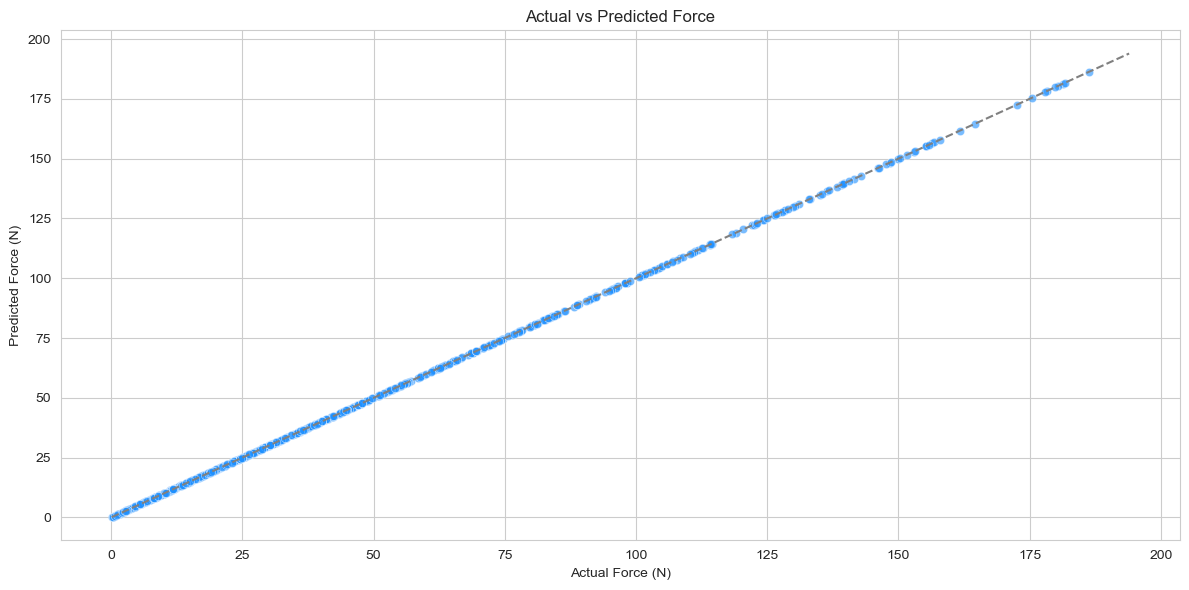

In [6]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="dodgerblue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel("Actual Force (N)")
plt.ylabel("Predicted Force (N)")
plt.title("Actual vs Predicted Force")
plt.tight_layout()
plt.show()

In [7]:
import joblib
os.makedirs("../../models/", exist_ok=True)
joblib.dump(model, "../../models/newtons_law_regression_model.pkl")
print("Model saved to models/newtons_law_regression_model.pkl")


Model saved to models/newtons_law_regression_model.pkl
